# Exploratory Data Analysis

In this notebook we will look at our data and make some provisional insight into relationships between features etc.

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

%matplotlib inline

In [162]:
import matplotlib.patches as mpatches
import matplotlib.cm as cm


In [107]:
import warnings
warnings.filterwarnings("ignore")

In [108]:
import datetime as dt
import calendar

In [109]:
pd.set_option("display.max_columns", None)

In [110]:
!ls

Double_Tap_Feature_Engineering.ipynb gj_30minsupres.csv
Forex_Data_Analysis.ipynb            gj_4base.csv
README.md                            gj_4hr.csv
gj_30_RSI_exp.csv                    gj_cleandraft.csv
gj_30base.csv                        gpbjpy_dataframe_gen.ipynb


In [111]:
df = pd.read_csv("gj_cleandraft.csv")

In [112]:
df.head(8)

date     open     high      low    close        vwma  \
0  2019-01-07 00:30:00  138.224  138.281  138.145  138.150  137.854514   
1  2019-01-07 01:00:00  138.150  138.232  138.097  138.218  137.944878   
2  2019-01-07 01:30:00  138.218  138.282  138.024  138.087  138.033155   
3  2019-01-07 02:00:00  138.087  138.105  137.961  138.048  138.106844   
4  2019-01-07 02:30:00  138.048  138.074  137.927  137.930  138.121546   
5  2019-01-07 03:00:00  137.930  137.975  137.743  137.833  138.134645   
6  2019-01-07 03:30:00  137.833  137.875  137.772  137.859  138.135628   
7  2019-01-07 04:00:00  137.859  137.982  137.718  137.866  138.118147   

    sr_low  sr_high  volume   sent_30        RSI direction  body_size  \
0  137.268  138.012    6684  0.042286  64.369070     short      0.074   
1  137.268  138.012    7148  0.037044  66.094060      long      0.068   
2  137.268  138.012    8658  0.028058  60.061489     short      0.131   
3  137.268  138.012    5759  0.018790  58.353882     short      0.039   
4  137.268  138.012    4309  0.007308  53.406371     short      0.118   
5  137.268  138.012    5857 -0.005142  49.677708     short      0.097   
6  137.268  138.012    4925 -0.014812  50.671834      long      0.026   
7  137.268  138.012    8089 -0.022677  50.952768      long      0.007   

   top_wick  bottom_wick trade_class trade_class_two day_of_week  day  month  \
0     0.057        0.079         win            loss      Monday    7      1   
1     0.082        0.053        loss            loss      Monday    7      1   
2     0.064        0.194         win             win      Monday    7      1   
3     0.018        0.126    no_trade        no_trade      Monday    7      1   
4     0.026        0.121    no_trade        no_trade      Monday    7      1   
5     0.045        0.187    no_trade        no_trade      Monday    7      1   
6     0.042        0.061        loss            loss      Monday    7      1   
7     0.123        0.141    no_trade        no_trade      Monday    7      1   

   year  time_24h session   vfive   rel_vol  out_mag    signal break_level  \
0  2019  00:30:00   night  7188.0  0.929883    0.014     trade     in_wick   
1  2019  01:00:00   night  8176.8  0.874181    0.063     trade     in_body   
2  2019  01:30:00   night  9090.6  0.952412    0.344     trade    out_wick   
3  2019  02:00:00   night  8527.2  0.675368    0.000  no_trade    no_trade   
4  2019  02:30:00   night  7682.4  0.560892    0.000  no_trade    no_trade   
5  2019  03:00:00   night  6511.6  0.899472    0.000  no_trade    no_trade   
6  2019  03:30:00   night  6346.2  0.776055    0.148     trade     in_body   
7  2019  04:00:00   night  5901.6  1.370645    0.000  no_trade    no_trade   

    sent_4h  x_vwma   pos_can   neg_can  prof_loss   det_trade  short_rsi  \
0  0.004876       0  0.295486  0.000000     -0.014        loss        0.0   
1  0.004876       0  0.000000  0.273122     -0.063        loss        0.0   
2  0.004876       0  0.053845  0.000000      0.344  strong win        0.0   
3  0.037737       0  0.000000  0.058844      0.000           0        0.0   
4  0.037737       0  0.000000  0.191546      0.000           0        0.0   
5  0.037737       0  0.000000  0.301645      0.000           0        0.0   
6  0.037737       0  0.276628  0.000000     -0.148        loss        0.0   
7  0.037737       0  0.252147  0.000000      0.000           0        0.0   

   long_rsi   sr_dist  
0       0.0  0.138000  
1       0.0  1.008955  
2       0.0  0.075000  
3       0.0  0.036000  
4       0.0  0.662000  
5       0.0  0.565000  
6       0.0  0.153000  
7       0.0  0.146000

## Time Period Indicators

Let's show some visualisations that illustrate wins and losses in a give time period. 

In [113]:
#Lets show win and loss counts for each day of the week

#First create a new dataframe that ignores the 0 values in det_trade as we won;t need these in our final target class
weekday = df[df["det_trade"]!='0']

#Next narrow the dataframe to the features we want to visualise
weekday = weekday[['day_of_week', 'det_trade']]

#Create a new feature that will act as a counter 
weekday["count"] = 1plt.figure(figsize=(15, 8))

plt.scatter(x=df.prof_loss, 
            y=df.pos_can)

plt.ylabel("distance of close to vwma", fontsize=18)
plt.xlabel("net result", fontsize=18)
plt.title("graph to show relationship between distance to vwma and profits")

# plt.xticks(np.arange(-0.2, 0.2))
plt.xlim([-0.2, 0.2])
plt.ylim([0, 0.4])


#Organise the dataframe so it is grouped first by day and then by trade class, 
# add the class count values to to our new feature column
weekday = weekday.groupby(['day_of_week', 'det_trade'])["count"].sum().to_frame()

In [114]:
weekday.sort_values(by="day_of_week", inplace=True)

In [115]:
wkday.tail(10)

count
day_of_week det_trade         
Thursday    strong win     555
            win            344
Tuesday     loss           748
            strong loss     57
            strong win     581
            win            373
Wednesday   strong win     550
            loss           779
            strong loss     67
            win            356

In [116]:
weekday.head(8)

count
day_of_week det_trade         
Friday      loss           683
            strong loss     56
            strong win     506
            win            302
Monday      loss           811
            strong loss     56
            strong win     489
            win            388

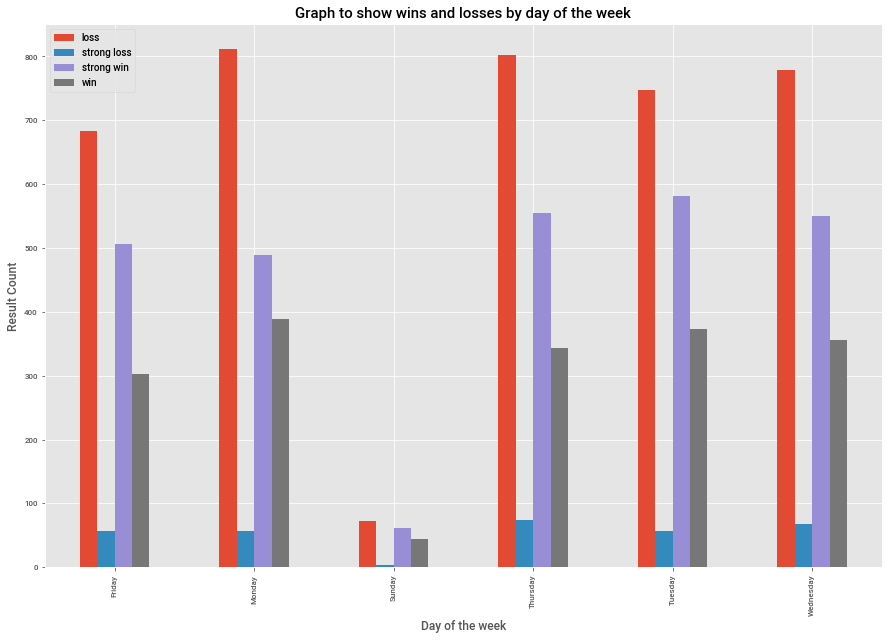

In [118]:
#plt the information

weekday.unstack().plot(kind='bar', figsize=(15,10));

plt.title('Graph to show wins and losses by day of the week', fontsize=15)
plt.ylabel("Result Count")
plt.xlabel("Day of the week")
plt.style.use('ggplot')
plt.legend(['loss', "strong loss", "strong win", "win"])
plt.show()

So we can see that losses are the single most prevelant class but strong losses are the smallest class by number. Strong wins are the second most prevelant class followed by wins. To fully gain insight into this visualisation we would need to know the overall profits and losses associated with each class outcome. 

In [119]:
day_net = df[df["det_trade"]!='0']

day_net = day_net[["day_of_week", "det_trade", "prof_loss"]]

day_net = day_net.groupby(['day_of_week', 'det_trade']).sum()

In [120]:
day_net.head(4)

prof_loss
day_of_week det_trade             
Friday      loss           -33.550
            strong loss    -15.749
            strong win     178.279
            win             35.305

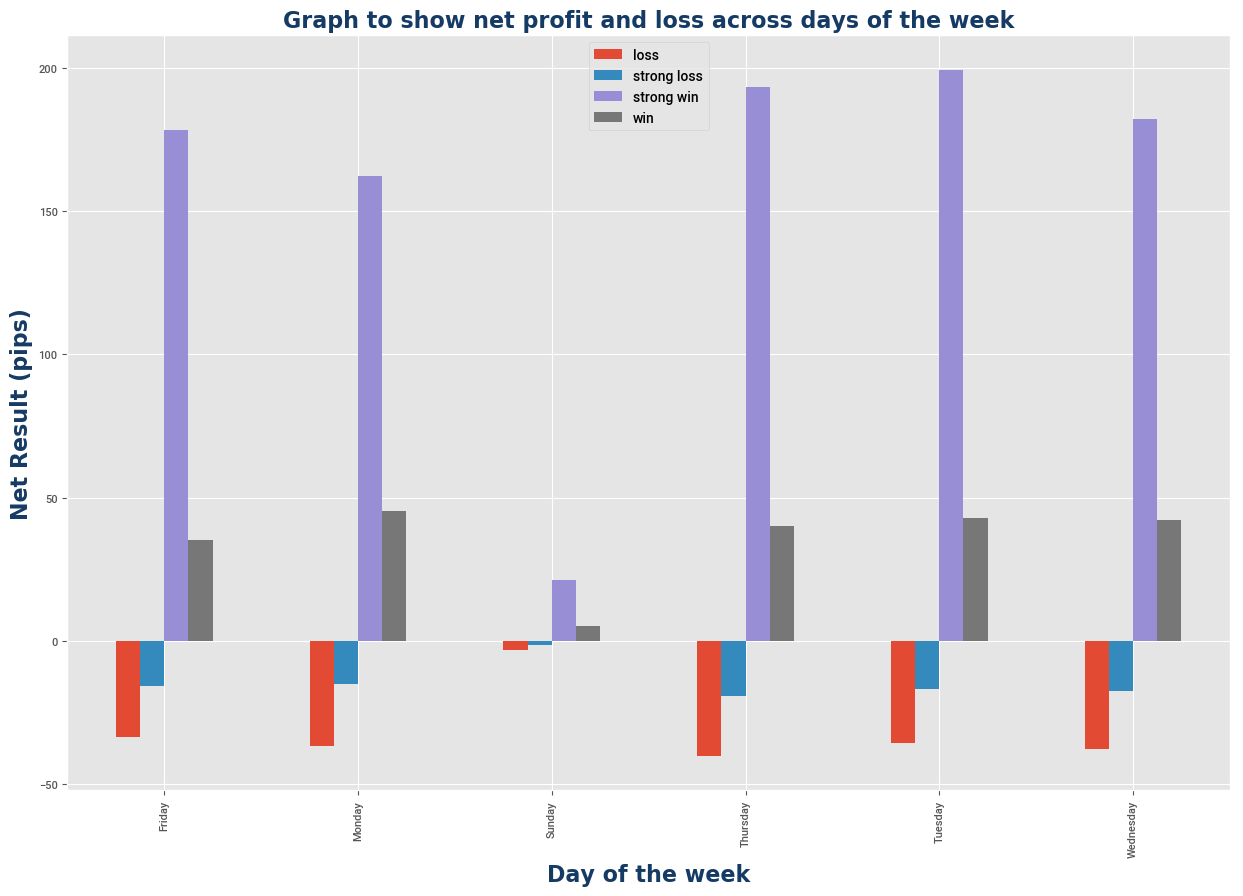

In [192]:
day_net.unstack().plot(kind='bar', figsize=(15,10));

font = {'family': 'helvetica',
        'color':  '#153B65',
        'weight': 'bold',
        'size': 16,
        }

plt.title('Graph to show net profit and loss across days of the week', fontdict=font)
plt.ylabel("Net Result (pips)", fontdict=font)
plt.xlabel("Day of the week", fontdict=font)
plt.style.use('ggplot')
plt.legend(['loss', "strong loss", "strong win", "win"])
plt.show()

This is a very interesting insight. Our strong winners have overwhelmingly become the top class by magnitude of result. Wins are at least as large if not larger than losses and strong losses remain the smallest category by prevelance. 

In [122]:
#Now let's review the sessions to see what the split is across this time period 

#First create a new dataframe that ignores the 0 values in det_trade as we won;t need these in our final target class
session = df[df["det_trade"]!='0']

#Next narrow the dataframe to the features we want to visualise
session = session[['session', 'det_trade']]

#Create a new feature that will act as a counter 
session["count"] = 1

#Organise the dataframe so it is grouped first by trading session and then by trade class, 
# add the class count values to to our new feature column
session = session.groupby(['session', 'det_trade'])["count"].sum().to_frame()


In [123]:
session.head(4)

count
session   det_trade         
afternoon loss           838
          strong loss    122
          strong win     835
          win            424

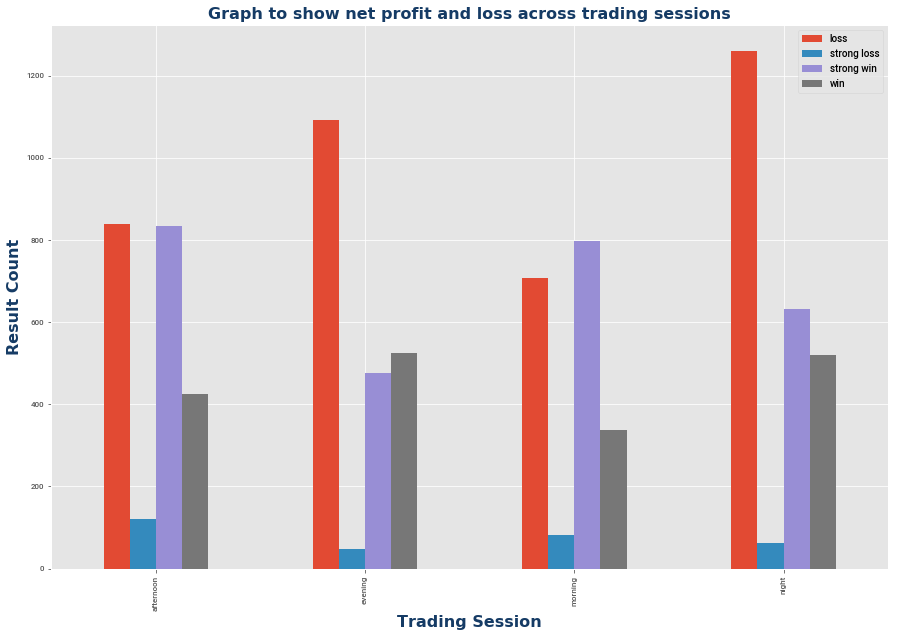

In [124]:
session.unstack().plot(kind='bar', figsize=(15,10));

font = {'family': 'helvetica',
        'color':  '#153B65',
        'weight': 'bold',
        'size': 16,
        }

plt.title('Graph to show net profit and loss across trading sessions', fontdict=font)
plt.ylabel("Result Count", fontdict=font)
plt.xlabel("Trading Session", fontdict=font)
plt.style.use('ggplot')
plt.legend(['loss', "strong loss", "strong win", "win"])
plt.show()

In [125]:
#Now let's look at the net profit and loss broken down by session. 
sess_net = df[df["det_trade"]!="0"]

sess_net = sess_net[["session", "det_trade", "prof_loss"]]

sess_net = sess_net.groupby(["session", "det_trade"]).sum()


sess_net

prof_loss
session   det_trade             
afternoon loss           -44.207
          strong loss    -34.904
          strong win     294.294
          win             50.298
evening   loss           -46.745
          strong loss    -15.144
          strong win     155.159
          win             60.237
morning   loss           -41.681
          strong loss    -19.811
          strong win     279.220
          win             40.182
night     loss           -54.372
          strong loss    -15.462
          strong win     208.270
          win             60.366

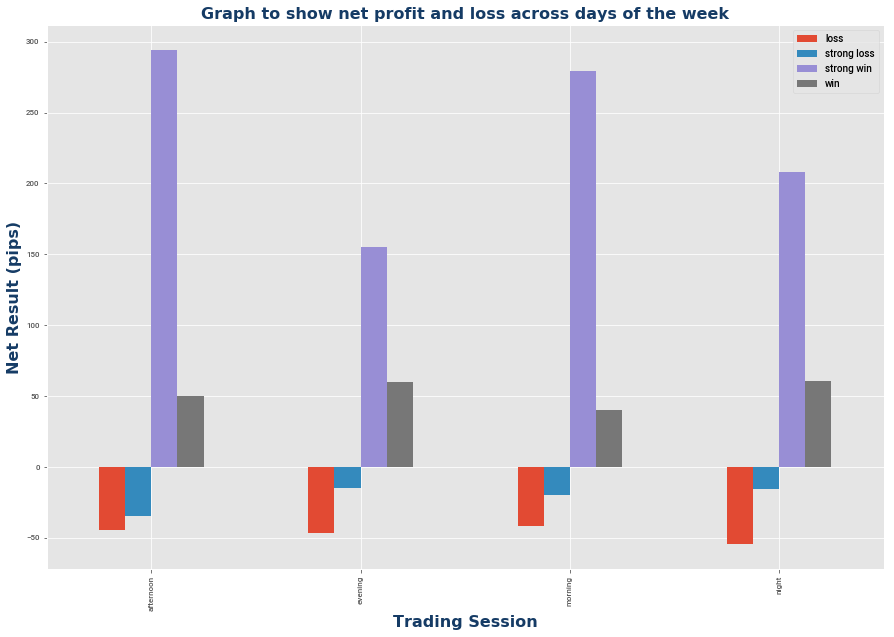

In [126]:
sess_net.unstack().plot(kind='bar', figsize=(15,10));

font = {'family': 'helvetica',
        'color':  '#153B65',
        'weight': 'bold',
        'size': 16,
        }

plt.title('Graph to show net profit and loss across days of the week', fontdict=font)
plt.ylabel("Net Result (pips)", fontdict=font)
plt.xlabel("Trading Session", fontdict=font)
plt.style.use('ggplot')
plt.legend(['loss', "strong loss", "strong win", "win"])
plt.show()

Again, we can take some interesting insight from the last two visuals. Overall there are more losses than any other category, however in the mornings we actually have more strong wins than losses and in the afternoon these classes are roughly equal. As expected we have a much larger proportion of losses in the evening and night. In line with our daily results, strong wins are keeping the net session results firmly in positive territory.

Net results \
afternoon + 265 pips \
evening + 154 pips \
morning + 259 pips \
night + 199 pips

In [127]:
sess_netA = df[df["det_trade"]!="0"]

sess_netA = sess_netA[["session", "prof_loss"]]

sess_netA = sess_netA.groupby(["session"]).sum()


sess_netA

prof_loss
session             
afternoon    265.481
evening      153.507
morning      257.910
night        198.802

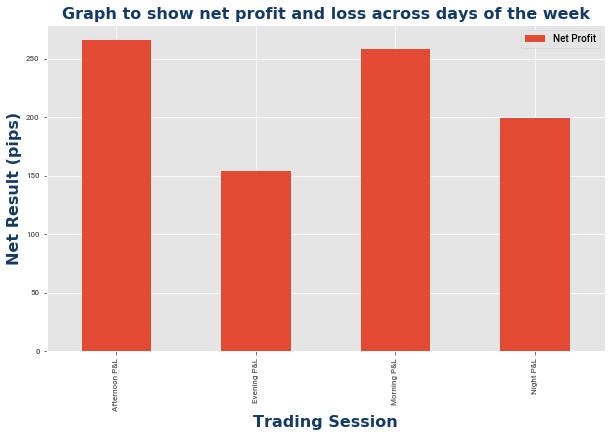

In [128]:
sess_netA.unstack().plot(kind='bar', figsize=(10,6));

n=4
font = {'family': 'helvetica',
        'color':  '#153B65',
        'weight': 'bold',
        'size': 16,
        }

ind = np.arange(n)
plt.title('Graph to show net profit and loss across days of the week', fontdict=font)
plt.ylabel("Net Result (pips)", fontdict=font)
plt.xlabel("Trading Session", fontdict=font)
plt.xticks(ind, ('Afternoon P&L', 'Evening P&L', 'Morning P&L', 'Night P&L'))
plt.style.use('ggplot')
plt.legend(['Net Profit'])
plt.show()

## Break Level Correlations
We'll now illustrate the relationship between the break level (see feature report) and total profits broken down by the different trade outcomes under the det_trade feature

In [220]:
#Create a dataframe that shows the net profits across break levels
#First create a new dataframe that ignores the 0 values in det_trade as we won;t need these in our final target class
break_level = df[df["det_trade"]!='0']

#Next narrow the dataframe to the features we want to visualise
break_level = break_level[['break_level', 'det_trade', 'prof_loss']]


#Organise the dataframe so it is grouped first by tbreak level and then by detailed trade class, 
break_level = break_level.groupby(['break_level', 'det_trade']).sum()

In [221]:
#Create a dataframe that shows the mean average profits across break levels
#First create a new dataframe that ignores the 0 values in det_trade as we won;t need these in our final target class
mean_level = df[df["det_trade"]!='0']

#Next narrow the dataframe to the features we want to visualise
mean_level = mean_level[['break_level', 'det_trade', 'prof_loss']]


#Organise the dataframe so it is grouped first by tbreak level and then by detailed trade class, 
mean_level = mean_level.groupby(['break_level', 'det_trade']).mean()

In [223]:
mean_level

prof_loss
break_level det_trade             
in_body     loss         -0.050172
            strong loss  -0.266767
            strong win    0.328773
            win           0.116281
in_wick     loss         -0.045777
            strong loss  -0.268397
            strong win    0.348432
            win           0.116918
out_wick    loss         -0.044287
            strong loss  -0.302604
            strong win    0.356200
            win           0.117652

In [224]:
mean_level.unstack()

prof_loss                                 
det_trade        loss strong loss strong win       win
break_level                                           
in_body     -0.050172   -0.266767   0.328773  0.116281
in_wick     -0.045777   -0.268397   0.348432  0.116918
out_wick    -0.044287   -0.302604   0.356200  0.117652

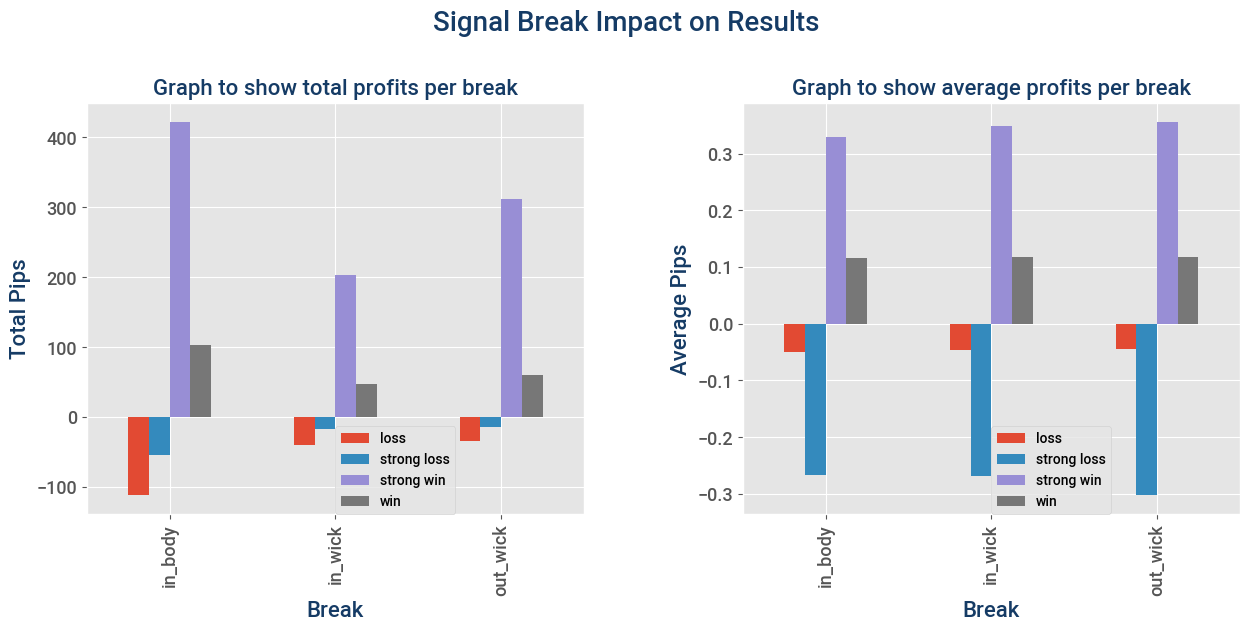

In [342]:
fig, axes = plt.subplots(ncols=2)

font = {
        'color':  '#153B65',
        'weight': 'bold',
        'size': 16,
        }


break_level.unstack().plot(kind='bar', ax=axes[0], 
                           figsize=(14,6)); axes[0].set_title("Graph to show total profits per break", fontdict=font)
# plt.legend(["loss", "strong loss", "strong win", "win"])


mean_level.unstack().plot(kind='bar', ax=axes[1], 
                          figsize=(14,7.1)); axes[1].set_title("Graph to show average profits per break", fontdict=font)
# plt.legend(["loss", "strong loss", "strong win", "win"])


for ax in axes:
    if ax==axes[0]:
        ax.legend(["loss", "strong loss", "strong win", "win"], loc=[0.5,0])
        ax.set_xlabel("Break", fontdict=font)
        ax.set_ylabel("Total Pips", fontdict=font)
#         ax.set_xticklabels(x_ticks, rotation=60, fontsize=11)
#         ax.set_yticklabels(y_ticks, rotation=60, fontsize=11)
    else:
        ax.legend(["loss", "strong loss", "strong win", "win"], loc=[0.5,0])
#         ax.set(xlabel="Break", ylabel="average pips")
        ax.set_xlabel("Break", fontdict=font)
        ax.set_ylabel("Average Pips", fontdict=font)
        
#         ax.set_xticklabels(x_ticks, rotation=60, fontsize=11)
#         ax.set_yticklabels(y_ticks, rotation=60, fontsize=11)

plt.rc('xtick', labelsize=13)
plt.rc('ytick', labelsize=13)


plt.suptitle("Signal Break Impact on Results", fontsize=20, color='#153B65', weight="bold");
plt.tight_layout(pad=6)


So we can see that while the total profits look good for candles closing inside the body look good this may very well be because we have more signal candles closing inside the previous candle. Indeed when we compare with the average profits there is very little to take away from this relationship... at best there is a small improvement in strong wins when signals close outside the previous wick but conversely and inversely the same can be said of an increase in strong loss size for the same break.

# Sweetviz

We've recently heard about a python library called sweetviz. Let's see what it can do for our EDA. 

In [129]:
!pip install sweetviz

In [130]:
#Import sweetviz
import sweetviz as sv

#analyse the dataset (is it smart enough to understand what's going on)
forex_report = sv.analyze(df)

#display the report
forex_report.show_html("forex.html")



                                   |                         | [  0%]   00:00  -> (? left)
Summarizing dataframe:             |                         | [  0%]   00:00  -> (? left)
Summarizing dataframe:             |▌                    | [  3%]   00:00  -> (00:19 left)
:date:                             |█                    | [  5%]   00:00  -> (00:19 left)
:date:                             |█▋                   | [  8%]   00:02  -> (00:24 left)
:open:                             |█▋                   | [  8%]   00:02  -> (00:24 left)
:open:                             |██▏                  | [ 11%]   00:03  -> (00:19 left)
:high:                             |██▏                  | [ 11%]   00:03  -> (00:19 left)
:high:                             |██▊                  | [ 13%]   00:03  -> (00:16 left)
:low:                              |██▊                  | [ 13%]   00:03  -> (00:16 left)
:low:                              |███▎                 | [ 16%]   00:03  -> (00:13 left

Creating Associations graph... DONE!


1.008955    5022
0.018000      28
0.041000      23
0.024000      22
0.137000      21
            ... 
4.953000       1
0.130000       1
0.130000       1
1.471000       1
5.375000       1
Name: sr_dist, Length: 6376, dtype: int64

(0, 0.4)

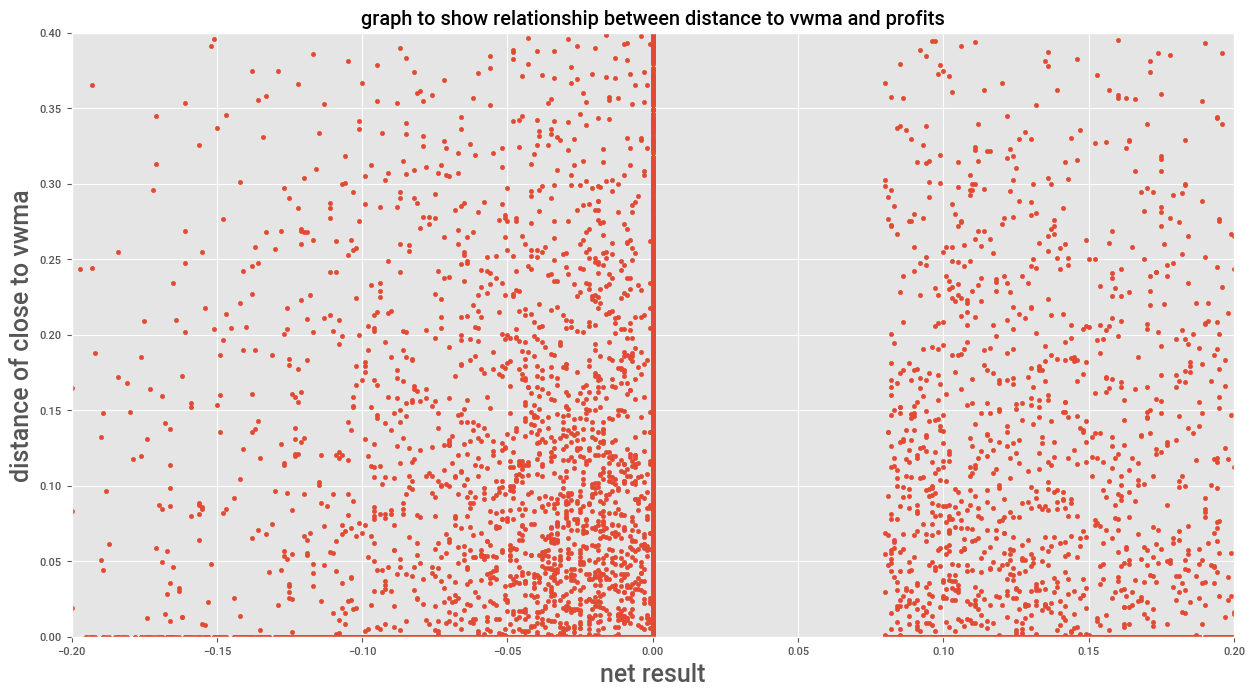

In [200]:
plt.figure(figsize=(15, 8))

plt.scatter(x=df.prof_loss, 
            y=df.pos_can)

plt.ylabel("distance of close to vwma", fontsize=18)
plt.xlabel("net result", fontsize=18)
plt.title("graph to show relationship between distance to vwma and profits")

# plt.xticks(np.arange(-0.2, 0.2))
plt.xlim([-0.2, 0.2])
plt.ylim([0, 0.4])


#This looks horribly random

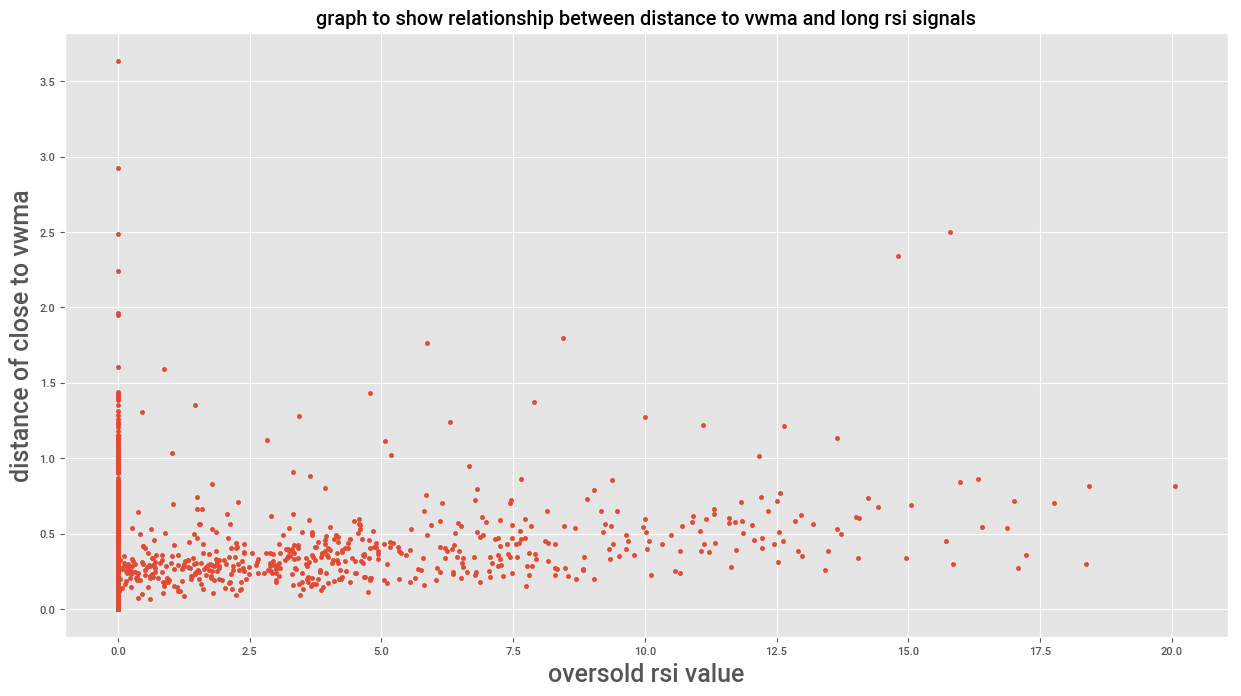

In [206]:
#plot relationship between distance to vwma of long closes with oversold rsi (long_rsi)
plt.figure(figsize=(15, 8))

plt.scatter(x=df.long_rsi, 
            y=df.pos_can);

plt.ylabel("distance of close to vwma", fontsize=18)
plt.xlabel("oversold rsi value", fontsize=18)
plt.title("graph to show relationship between distance to vwma and long rsi signals");

# plt.xticks(np.arange(-0.2, 0.2))
# plt.xlim([-0.2, 0.2])
# plt.ylim([0, 0.4])


In [202]:
df.short_rsi.value_counts()

0.00    18184
3.58        4
2.86        4
2.26        3
0.03        3
        ...  
2.64        1
2.56        1
1.40        1
2.36        1
6.95        1
Name: short_rsi, Length: 438, dtype: int64

## Sandpit / Scrapbook

In [152]:
temp = df.loc[df.RSI<30]
temp = temp.loc[temp['det_trade'] != "loss"]
temp = temp.loc[temp['det_trade'] != 'strong loss']
temp = temp[["day_of_week", "RSI", "pos_can", "prof_loss",]]
temp = temp.groupby(["day_of_week"]).mean()
temp.reset_index(inplace=True)
temp
                     
            

day_of_week        RSI   pos_can  prof_loss
0      Friday  25.442077  0.078963   0.067645
1      Monday  24.769931  0.112786   0.060904
2      Sunday  25.763790  0.068169   0.050522
3    Thursday  25.911339  0.086772   0.076778
4     Tuesday  24.593284  0.061202   0.066206
5   Wednesday  25.527205  0.113135   0.074197

In [173]:
colors = ['#6b5b95', '#feb236', '#d64161', '#ff7b25', '#a2b9bc', '#b2ad7f']

In [174]:
temp['color'] = colors

In [175]:
temp

day_of_week        RSI   pos_can  prof_loss    color
0      Friday  25.442077  0.078963   0.067645  #6b5b95
1      Monday  24.769931  0.112786   0.060904  #feb236
2      Sunday  25.763790  0.068169   0.050522  #d64161
3    Thursday  25.911339  0.086772   0.076778  #ff7b25
4     Tuesday  24.593284  0.061202   0.066206  #a2b9bc
5   Wednesday  25.527205  0.113135   0.074197  #b2ad7f

0 Friday 25.442077152245336 0.07896279582632276 0.06764497041420103 #6b5b95
1 Monday 24.769931424149203 0.11278576755320148 0.06090410958904175 #feb236
2 Sunday 25.76379047069611 0.06816936081934545 0.05052173913043258 #d64161
3 Thursday 25.911339432826768 0.08677247780814255 0.07677777777777824 #ff7b25
4 Tuesday 24.593284022431384 0.061202038749466836 0.06620555555555611 #a2b9bc
5 Wednesday 25.52720469120156 0.11313451372144218 0.0741967213114771 #b2ad7f


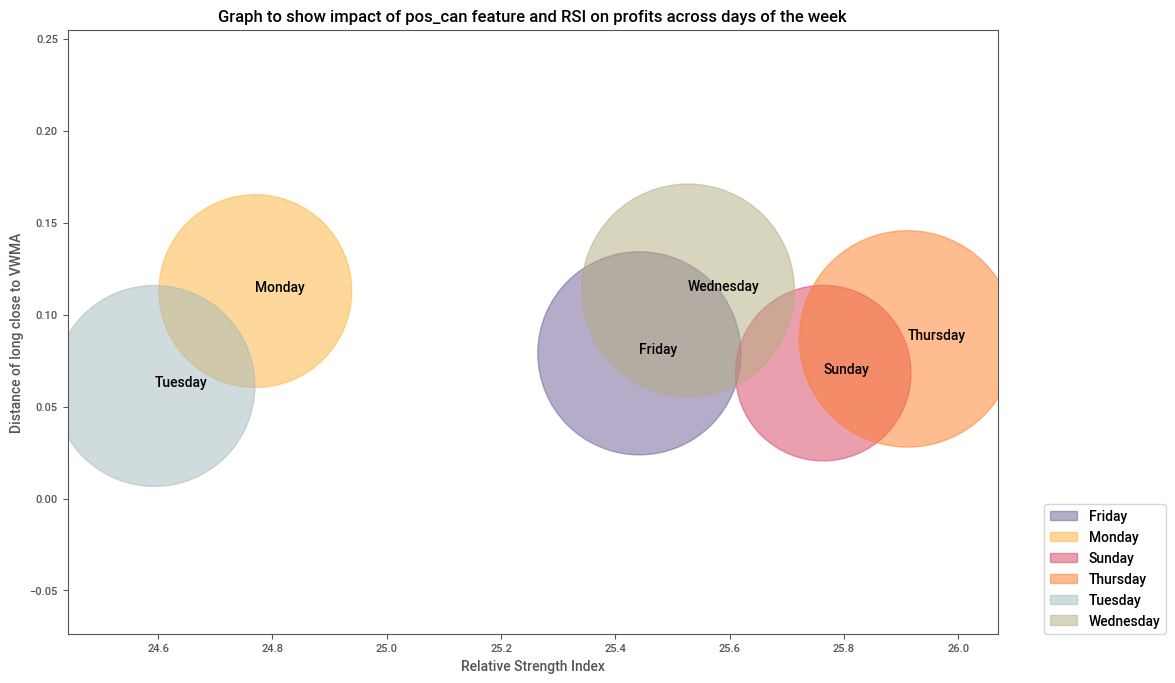

In [188]:
plt.figure(figsize=(12,8))

t=np.arange(6)

plt.scatter(x=temp.RSI,
            y=temp.pos_can,
            s=temp.prof_loss*10**5.5,
            alpha=0.5,
            c=temp.color)

plt.title("Graph to show impact of pos_can feature and RSI on profits across days of the week")
plt.xlabel("Relative Strength Index")
plt.ylabel("Distance of long close to VWMA")


x,y = temp.RSI, temp.pos_can
for i, txt in enumerate(temp.day_of_week):
    plt.annotate(txt, (x[i], y[i]))
    print(i, txt, x[i], y[i], temp.prof_loss[i], temp.color[i])
    
day = list(temp.day_of_week)
colors_ = list(temp.color)

l=[]

for i in range(0, len(temp.index)):
    l.append(mpatches.Patch(color=colors_[i], alpha=0.5, label=day[i]))
    
plt.legend(handles=l, loc=(1.05,0))

plt.show()